# <center> NIRS <center> Pre-Processing
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## READING THE DATASET INTO PYTHON

In [4]:
import pandas as pd
import numpy as np
import warnings
# warnings.filterwarnings('ignore')
df = pd.read_excel('Datasets/Lucas/dados_nirs_lucas.xlsx')

In [5]:
df.describe()

,Peso corporal kg,Consumo MS kg/dia,Consumo MO kg/dia,Consumo PB kg/dia,Consumo FDN kg/dia,Consumo EE kg/dia,Consumo CNF kg/dia,Fezes MS kg/dia,Fezes MO kg/dia,Fezes PB kg/dia,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,509.824906,6.379836,6.030204,0.619715,3.469328,0.192359,1.711190,2.704554,2.330777,0.263546,...,0.229030,0.213754,0.260170,0.291170,0.286859,0.283470,0.269462,0.242059,0.239917,0.225538
std,102.339137,2.002452,1.875748,0.336699,1.073802,0.080614,0.641736,0.795194,0.720937,0.096765,...,0.199782,0.237003,0.188358,0.156556,0.175760,0.191097,0.185356,0.187441,0.166877,0.164253
min,281.000000,1.429860,1.435228,0.092339,0.577233,0.051604,0.441309,0.760456,0.622813,0.054601,...,-0.276049,-0.395581,-0.238561,-0.024993,-0.125093,-0.180869,-0.196580,-0.261695,-0.144254,-0.129140
25%,425.500000,4.945368,4.651638,0.351819,2.707140,0.134618,1.212661,2.130980,1.851124,0.192972,...,0.107274,0.069525,0.139561,0.179395,0.165436,0.147912,0.157507,0.108506,0.116012,0.106476
50%,530.000000,6.231714,5.898576,0.568794,3.385846,0.182511,1.674349,2.681238,2.313793,0.255564,...,0.229640,0.233216,0.255576,0.287353,0.282204,0.287219,0.283499,0.255783,0.239895,0.216038
75%,582.000000,7.716805,7.304223,0.795090,4.207334,0.232064,2.106837,3.202887,2.748287,0.316227,...,0.350355,0.366050,0.391686,0.387802,0.396442,0.404799,0.388062,0.374971,0.352256,0.347993
max,744.500000,12.277564,11.729826,1.780895,6.722461,0.483549,3.866051,5.143320,4.547951,0.570620,...,0.940678,1.049306,0.902545,0.783421,0.916157,0.859193,0.886101,0.702963,0.752801,0.859664


## DATA EDITING

In [6]:
# Transform all feautere names to string
df.columns = df.columns.map(str)

## Dectecting Outliers

/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


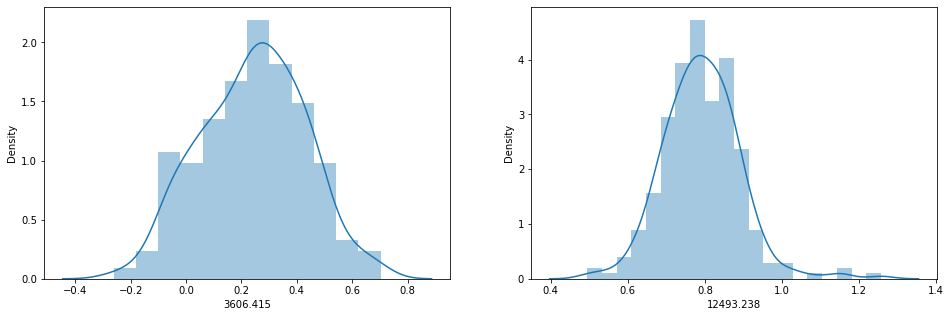

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['3606.415'])
plt.subplot(1,2,2)
sns.distplot(df['12493.238'])
plt.show()

In [8]:
df.loc[:,'12493.238':]

,12493.238,12489.381,12485.523,12481.666,12477.809,12473.952,12470.095,12466.238,12462.381,12458.523,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
0,0.694813,0.693530,0.691832,0.691662,0.692699,0.690240,0.684262,0.683389,0.689459,0.693701,...,0.297051,0.376922,0.414575,0.370923,0.402980,0.438569,0.291648,0.354532,0.570205,0.636416
1,0.634488,0.637065,0.637865,0.636238,0.633107,0.631523,0.632016,0.632230,0.631572,0.630250,...,0.321032,0.420550,0.391288,0.225440,0.125289,0.145890,0.204142,0.244242,0.222383,0.139091
2,0.645751,0.646358,0.644643,0.640294,0.636128,0.633839,0.633571,0.635430,0.636239,0.635277,...,0.545665,0.562719,0.450706,0.324225,0.204198,0.143211,0.122496,0.109812,0.117597,0.063111
3,0.589074,0.589516,0.585208,0.578014,0.575600,0.580763,0.585474,0.584213,0.583286,0.586672,...,0.066493,0.223886,0.256033,0.176935,0.177885,0.210705,0.207575,0.247724,0.301441,0.276390
4,0.695093,0.692740,0.692759,0.690685,0.685198,0.682580,0.684526,0.688006,0.691361,0.692790,...,0.575148,0.587424,0.511461,0.328530,0.208506,0.266448,0.274464,0.273725,0.251651,0.200368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.855913,0.854747,0.858006,0.859808,0.854978,0.850334,0.848747,0.849106,0.848972,0.843936,...,0.011714,-0.080064,-0.002441,0.070507,0.171221,0.313684,0.443823,0.429430,0.286096,0.170770
263,0.889379,0.888781,0.886829,0.884761,0.882735,0.881070,0.877802,0.870896,0.866668,0.870520,...,-0.090991,-0.308692,-0.116700,0.244079,0.407548,0.362647,0.308818,0.253203,0.321587,0.257085
264,0.876798,0.870923,0.865248,0.865426,0.868177,0.865570,0.855866,0.847892,0.851206,0.859830,...,-0.026653,-0.265636,-0.113351,0.044593,0.140338,0.222888,0.266830,0.219608,0.158773,0.127144
265,0.851567,0.850370,0.848645,0.848228,0.852468,0.853390,0.846991,0.845604,0.850210,0.848472,...,-0.072986,-0.185276,-0.095231,0.124006,0.370194,0.539745,0.452269,0.205503,0.097278,0.084465


In [9]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':]

In [7]:
# Add Categoria feature
x = x.join(df.loc[:,['Categoria']])

In [8]:
# One-Hot Encode categorical features
x = pd.get_dummies(x, drop_first=False)

In [9]:
# Non NIRS features
print(df.loc[:,:'CD CNF'].columns.tolist())

['Animal', 'Coleta', 'Aluno', 'Experimento', 'Categoria', 'Dieta', 'Status fisiologico', 'Peso corporal kg', 'Consumo MS kg/dia', 'Consumo MO kg/dia', 'Consumo PB kg/dia', 'Consumo FDN kg/dia', 'Consumo EE kg/dia', 'Consumo CNF kg/dia', 'Consumo de FDNi kg/dia', 'Fezes MS kg/dia', 'Fezes MO kg/dia', 'Fezes PB kg/dia', 'Fezes FDN kg/dia', 'Fezes EE kg/dia', 'Fezes CNF kg/dia', 'TD MO', 'TD PB', 'TD FDN', 'TD EE', 'TD CNF', 'TF MO', 'TF PB', 'TF FDN', 'TF EE', 'TF CNF', 'TF FDNpd', 'CD MS', 'CD MO', 'CD PB', 'CD FDN', 'CD EE', 'CD CNF']


In [10]:
# Response variable vector
y = df['CD FDN']

In [11]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

N. samples training 186 , N. samples testing 81


In [24]:
corrs_cd_fdn = df.corr(method='pearson').loc[:, 'CD FDN'].sort_values(ascending=False)

In [30]:
corrs_cd_fdn[:50]

CD FDN                1.000000
CD MO                 0.829783
CD MS                 0.745890
CD EE                 0.390148
CD PB                 0.381372
Consumo FDN kg/dia    0.294694
TF CNF                0.274981
Consumo MO kg/dia     0.258048
3606.415              0.250867
Consumo MS kg/dia     0.245162
3602.558              0.227264
Consumo PB kg/dia     0.206987
3610.272              0.203304
3614.129              0.199781
3617.986              0.183832
Consumo EE kg/dia     0.176154
TD FDN                0.169984
3783.843              0.148549
Fezes CNF kg/dia      0.136226
3737.557              0.135600
3729.843              0.132563
3598.7                0.131276
TD PB                 0.128416
TD MO                 0.126543
3779.985              0.125934
3722.129              0.122785
3725.986              0.109696
3718.271              0.107689
3733.7                0.106226
Peso corporal kg      0.103717
5280.408              0.102369
5276.551              0.102259
5272.694

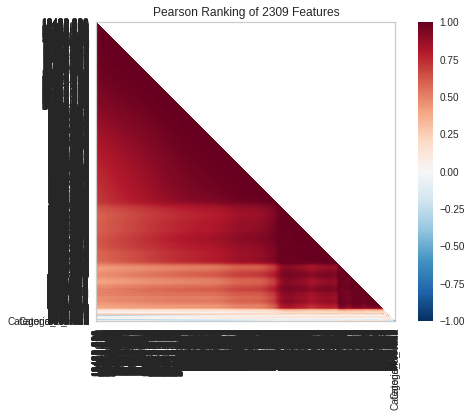

<AxesSubplot:title={'center':'Pearson Ranking of 2309 Features'}>

In [16]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(x)
visualizer.show()

## FUNCTIONS

In [15]:
def evalute_model(model_test_preds, y_test, model_train_preds=None, y_train=None):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    if (model_train_preds.any()):
        return pd.DataFrame({
            'R2': [r2_score(y_test, model_test_preds), r2_score(y_train, model_train_preds)], 
            'MAE':[mean_absolute_error(y_test, model_test_preds), mean_absolute_error(y_train, model_train_preds)],
            'RMSE': [mean_squared_error(y_test, model_test_preds, squared=False), mean_squared_error(y_train, model_train_preds, squared=False)]}, index=['Teste', 'Treino'])
    else:
        return pd.DataFrame({
            'R2': [r2_score(y_test, model_test_preds)], 
            'MAE':[mean_absolute_error(y_test, model_test_preds)],
            'RMSE': [mean_squared_error(y_test, model_test_preds, squared=False)]}, index=['Teste'])

In [16]:
def plot_graphical_analysis(y_test, preds, model):
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    # Dispersion plot
    plt.figure(figsize=(12,6))
    plt.title("Dipersão dos dados reais vs predições usando " + type(model).__name__)
    sns.scatterplot(x=y_test.index, y=y_test, label="Real")
    sns.scatterplot(x=y_test.index, y=preds, label="Predito")
    plt.figure(figsize=(12,6))
    plt.title("Real vs Predito usando " + type(model).__name__)
    # Regression plot
    sns.regplot(x=y_test, y=preds)
    plt.xlabel("Real")
    plt.ylabel("Predito")
    plt.legend(["Ponto","R² = " + str("%.2f"%r2_score(y_test, preds))])